# First Step is to download the CSV as a Panda DataFrame

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **BASIC EDA of DATA**

In [5]:
df.head(5)       


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail(5) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3910,8938-UMKPI,Female,0,No,No,47,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,5127.95,Yes
5679,5229-PRWKT,Male,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.55,649.65,Yes
6276,5003-OKNNK,Female,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.35,335.95,No
3218,6869-FGJJC,Male,0,No,No,68,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Credit card (automatic),79.60,5461.45,No
6236,1932-UEDCX,Male,1,Yes,No,33,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.60,3270.25,No


In [8]:
df.shape

(7043, 21)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.index 

RangeIndex(start=0, stop=7043, step=1)

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df["PaymentMethod"].nunique()


4

In [15]:
df["PaymentMethod"].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
df["Contract"].nunique()


3

In [17]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

##### Below I needed to change the type of Total Charges Column to a float and Senior Citizen to a Boolean

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [19]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype("boolean")
df['SeniorCitizen']

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: SeniorCitizen, Length: 7043, dtype: boolean

# **NOTIBLE DATA FINDINGS:** 

1) There are 21 columns of data.

2) Mostly object type, two int types and one float type.

3) 3 Numeric Type columns (SeniorCitizen, MonthlyCharge, Tenure, MonthlyCharges)

4) Numeric Columns see to make sense alothough it is unclear how they define a Senior Citizen. (Going to assume it is someone who is over the age of 60.) 

5) No NAN values

6) Tenure refers to the number of months that a customer has subscribed for.

7) 4 types of payment methods. 3 different types of contract (Seen above)

# **Next we need to decide which of these features are relevant for the churn rate.**

**CHURN RATE** is the percentage of total customers that stop using/paying over a period of time. 

So, if there were **10,000** total customers in March and **1,000** of them stopped being customers, the monthly churn rate would be **10%.**

Therefore the columns I am going to include in my extended EDA before the model are: 

1) Gender
2) Tenure
3) Contract Type
4) Churn
5) Monthly Charge
6) Total Charge
7) Payment Method
8) Senior Citizen
9) Dependents
10) Partners


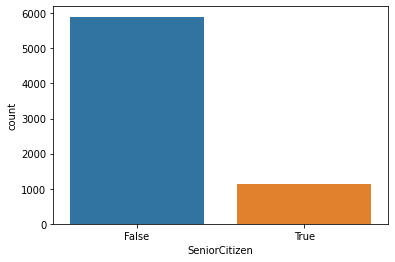

In [20]:
sns.countplot(data = df,
              x='SeniorCitizen')

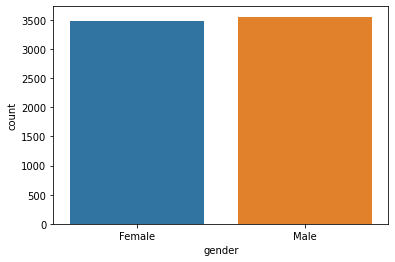

In [21]:
sns.countplot(data = df,
              x='gender')

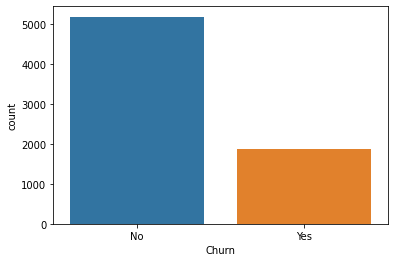

In [22]:
sns.countplot(data = df,
              x='Churn')

In [23]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

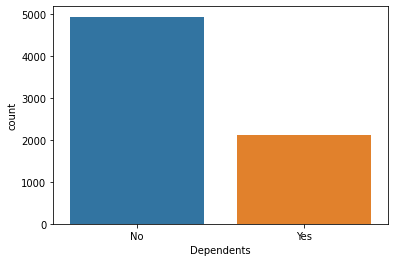

In [24]:
sns.countplot(data = df,
              x='Dependents')

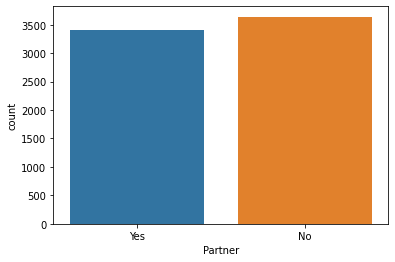

In [25]:
sns.countplot(data = df,
              x='Partner')

In [26]:
plot_data = df.groupby('gender').sum().reset_index()
plot_data

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,568,112469,227432.4,7952354.2
1,Male,574,115521,228684.2,8103814.5


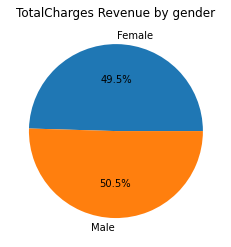

In [27]:
plt.pie(x=plot_data['TotalCharges'],
        labels=plot_data['gender'],
        autopct='%1.1f%%')
plt.title("TotalCharges Revenue by gender")
plt.show()

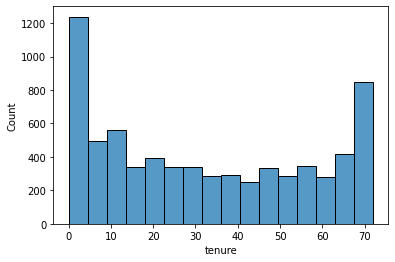

In [28]:
sns.histplot(data=df,
             x='tenure')

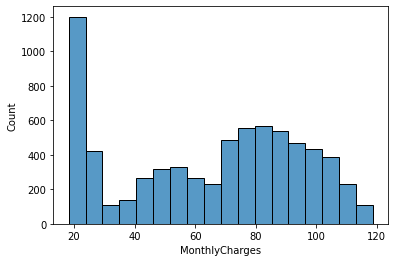

In [29]:
sns.histplot(data=df,
             x='MonthlyCharges')

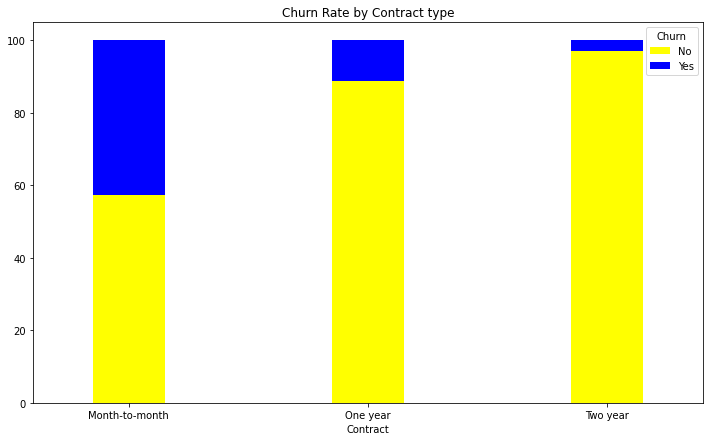

In [32]:
import matplotlib.ticker as mtick
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['yellow','blue']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors, title = "Churn Rate by Contract type")

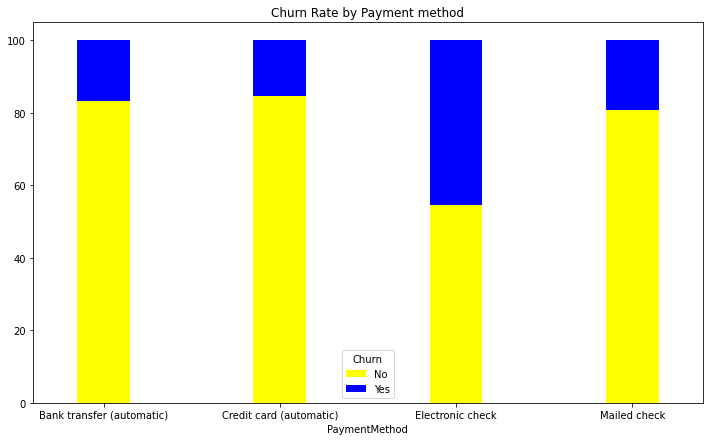

In [33]:
contract_churn = df.groupby(['PaymentMethod','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ["yellow",'blue']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors, title = "Churn Rate by Payment method")

# **EDA FINDINGS**

### Customer Base is split very evenly between Male and Female

### Mostly comprised of customers younger than 60 years old

### At the time of reporting around churn percentage was a little under 2/7 (28.5%). There for around 73 % of customers are active. 

### Pretty even split in customer base between having a partner or not

### Customer is more than twice as likely to have a dependent than to not. 

### Total Revenue from TotalCharges is split very evenly between genders

### Large percentage of new customers

### Spike at the 20 dollar monthly charge rate. Monthlycharge can span from 18 dollars to 118 dollars.

### Customers on a month to month contract type are far more likely to churn. 

### Customers that pay by electronic check are the most likely to churn by far. 

# **Dividing Data into Training and Testing**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["gender",'customerID',"MultipleLines",	"InternetService",	"OnlineSecurity",	"OnlineBackup",	"DeviceProtection",	"TechSupport",	"StreamingTV",	"StreamingMovies", "Churn"]), 
                                                    df['Churn'], 
                                                    test_size=.2, 
                                                    random_state=42)

# TWO SEPERATE PIPELINES

In [53]:
 # Define categorical columns
categorical = list(X_train.select_dtypes(['object', "bool"]).columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")



Categorical columns are: ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns are: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [54]:
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('scaler', MinMaxScaler())])

tfm = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])

# LOGISTIC REGRESSION

In [1]:
### Putting everything together.
final_pipe = Pipeline(steps=[('preprocessor', tfm),
                       ('model', LogisticRegression())])

NameError: ignored

In [40]:
final_pipe.fit(X_train, y_train);

In [41]:
#### Example of PREDICTING

# Predict training data
y_train_pred = final_pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Predict test data
y_test_pred = final_pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Predictions on training data: ['No' 'No' 'Yes' ... 'No' 'Yes' 'No']
Predictions on test data: ['Yes' 'No' 'No' ... 'No' 'No' 'No']


In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.68      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [43]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      4138
         Yes       0.64      0.50      0.56      1496

    accuracy                           0.79      5634
   macro avg       0.74      0.70      0.71      5634
weighted avg       0.78      0.79      0.78      5634

